# Part I - Cardiovascular Disease Dataset
## by Kafayat Saka

## Introduction
   
   > The Cardiovascular disease dataset consists of 70,000 records of patients data.    
   
   This dataset is made up of 12 columns of patients records. 
   
   >All of the dataset values were collected at the moment of medical examination.
   


## Preliminary Wrangling


In [125]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> In this section my goal is to load my dataset and its structure and perform prelimiinary wrangling if needed. That is further cleaning, to ensure my data is in a tidy form. 

Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [126]:
#load in the dataset into a pandas dataframe and check its structure
cardio = pd.read_csv('cardio.csv',delimiter = ';',index_col= 'id')

In [127]:
#high-level overview of data shape and composition
print(cardio.shape)
print(cardio.dtypes)
print(cardio.head(10))

(70000, 12)
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object
      age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   
8   21914       1     151    67.0    120     80            2     2      0   
9   22113       1     157    93.0    130     80            3     1      0   
12  2

In [128]:
# Changing AGE from days format to year format
def age_years(age):
    ages = age /365
    return ages
'''This function divides age by 365 to give it in years'''

cardio['age'] = cardio['age'].apply(age_years)
#round it up into a whole number uaing numpy.ceil
cardio['age'] = cardio['age'].astype(float).apply(np.ceil)

In [129]:
# converting new age column data type back to integer
cardio['age']= cardio['age'].astype(int)

cardio['age'].head(5)

id
0    51
1    56
2    52
3    49
4    48
Name: age, dtype: int32

In [130]:
#converting all qualitative variables into object data types
cardio[['gender','cholesterol','gluc','smoke','alco','active','cardio']] = cardio[['gender','cholesterol','gluc','smoke','alco','active','cardio']].astype(str)

In [131]:
#Renaming some of the column names to proper naming conventions
cardio.rename(columns = {'ap_hi':'systolic','ap_lo':'diastolic','gluc':'glucose','alco':'alcohol_intake','active':'physical_activity','cardio':'cv_disease'},inplace = True)

In [132]:
#Replacing values in column with corresponding variable names (1 = Female, 2 = Male)
cardio['gender'] = cardio['gender'].replace({'1' :'Female','2': 'Male'},inplace=False )
cardio['cholesterol']=cardio['cholesterol'].replace({'1':'Normal','2':'High','3':'Extremely High'},inplace = False)
cardio['glucose'] =cardio['glucose'].replace({'1':'Normal','2':'High','3':'Extremely High'},inplace = False)
cardio['smoke'] =cardio['smoke'].replace({'1': 'Yes','0':'No'},inplace = False)
cardio['alcohol_intake'] =cardio['alcohol_intake'].replace({'1': 'Yes','0':'No'},inplace = False)
cardio['physical_activity']=cardio['physical_activity'].replace({'1': 'Yes','0':'No'},inplace = False)
cardio['cv_disease'] = cardio['cv_disease'].replace({'1': 'Yes','0':'No'},inplace = False)

In [133]:
#Adding a new column 'BMI' to the data frame
cardio['bmi']=(cardio['weight']/(cardio['height'] **2) * 10000)
cardio['bmi']=cardio['bmi'].round(decimals = 1)

In [134]:
#Checking to see all the wrangling performed
print(cardio.shape)
print(cardio.dtypes)
print(cardio.head(5))

(70000, 13)
age                    int32
gender                object
height                 int64
weight               float64
systolic               int64
diastolic              int64
cholesterol           object
glucose               object
smoke                 object
alcohol_intake        object
physical_activity     object
cv_disease            object
bmi                  float64
dtype: object
    age  gender  height  weight  systolic  diastolic     cholesterol glucose  \
id                                                                             
0    51    Male     168    62.0       110         80          Normal  Normal   
1    56  Female     156    85.0       140         90  Extremely High  Normal   
2    52  Female     165    64.0       130         70  Extremely High  Normal   
3    49    Male     169    82.0       150        100          Normal  Normal   
4    48  Female     156    56.0       100         60          Normal  Normal   

   smoke alcohol_intake physical_act

In [135]:
#convert categorical ordinal columns into CategoricalDataType
var_dict = {'cholesterol':['Normal','High','Extremely High'],
            'glucose':['Normal','High','Extremely High']}
for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = var_dict[var])
    cardio[var]=cardio[var].astype(ordered_var)
                                               

In [136]:
#Checking the statistics of the dataset using describe()
cardio.describe()

age        height        weight      systolic     diastolic  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      53.837914    164.359229     74.205690    128.817286     96.630414   
std        6.766821      8.210126     14.395757    154.011419    188.472530   
min       30.000000     55.000000     10.000000   -150.000000    -70.000000   
25%       49.000000    159.000000     65.000000    120.000000     80.000000   
50%       54.000000    165.000000     72.000000    120.000000     80.000000   
75%       59.000000    170.000000     82.000000    140.000000     90.000000   
max       65.000000    250.000000    200.000000  16020.000000  11000.000000   

                bmi  
count  70000.000000  
mean      27.555330  
std        6.092593  
min        3.500000  
25%       23.900000  
50%       26.400000  
75%       30.200000  
max      298.700000

In [137]:
#saving this cleaned dataframe to csv to use in the explanatory phase
cardio.to_csv('cardio_clean.csv', index= False)
#cardio_bp.to_csv('cardio_bp.csv', index = False)

### Dataset Structure:

> My dataset initially had 70,000 rows and 12 columns.

The age column was in days so I created a function which I applied to the entire column and rounded it up to a whole number.

I noticed some of my columns are not in the desired types and the content of the rows of some of the columns where in a binary form used to represent certain keywords.Which I wrangled to get my desire data types and value names.

I also noticed inappropriate naming conventions of some of the columns, I renamed these columns.

A particular variable,Bmi, that I have interest in exploring was also missing.I did some Feature engineering to create it using the height and weight column in the dataset.

> The Cholesterol and glucose are ordered factor variables with the following levels
-NORMAL   -HIGH  -EXTREMELY HIGH

The cholesterol and glucose columns which are ordinal categorical columns where also converted to their appropriate data type.

> The numeric variables are the age, height,weight,systolic,diastolic and bmi. With the rest being qualitative variables.

### Main Features of interest in the dataset:

> This dataset has a lot of interesting features that I believe would be worthwile to explore, so I will be exploring all besides the 'id'column.
The Features are the age,gender, height,weight,systolic,diastolic,cholesterol,glucose,smoke,alcohol intake,physical activity, cv disease and bmi. 
Some of these are features that have been said and proven to be risk factors of Cardiovascular diseases. 


## Univariate Exploration

> In this section, investigate distributions of individual variables. To get a deeper look, check for outliers and furter clean for bivariate exploration.


I will start by exploring the age variable

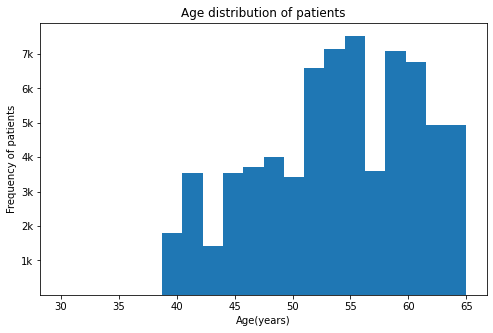

In [138]:
#setting figure size
plt.figure(figsize =[8,5])
#setting ticks and labels
ticks=[1000,2000,3000,4000,5000,6000,7000]
labels=['1k','2k','3k','4k','5k','6k','7k']
#using a standard scaled Hist plot
plt.hist(data= cardio, x ='age',bins= 20)
plt.yticks(ticks,labels)
#setting title and  axis label
plt.title('Age distribution of patients')
plt.ylabel('Frequency of patients')
plt.xlabel('Age(years)')
plt.show()

### Observation:
There seems to be some outliers from 40 below to 30,which is the minimum from the summary statistics. After applying a limit to the x axis. The distribution is a bimodal one with peaks at 56 and 59 respectively and a majority of the distribution of patients are between 50 and 65 . It is also observed that this dataset involves adults only.

>Next up  Height and Weight.

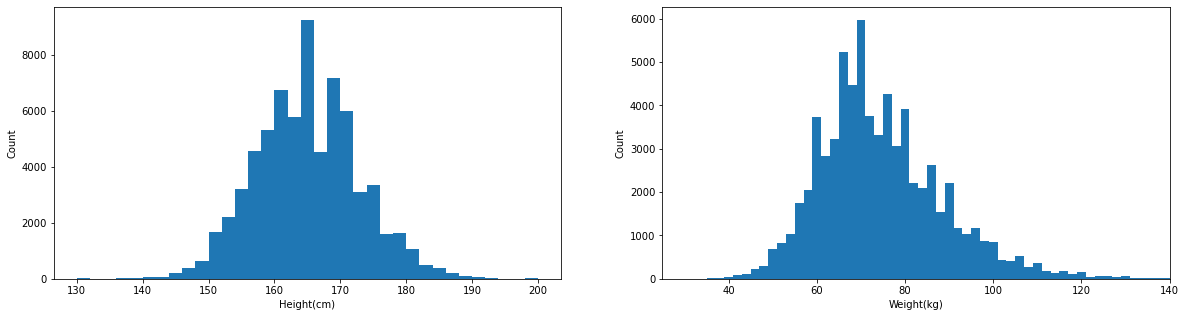

In [139]:
#using a standard scaled Hist plot and subplot
plt.figure(figsize = [20,5])

#For the first plot
plt.subplot(1, 2, 1)
binsize = 2
bins = np.arange(130,200+binsize,binsize)
plt.hist(data=cardio,x='height',bins = bins)
plt.xlabel('Height(cm)')
plt.ylabel('Count')

#For the second plot
plt.subplot(1, 2, 2)
binsize = 2
bins = np.arange(25,150+binsize,binsize)
plt.hist(data=cardio,x='weight',bins=bins)
plt.xlim([25,140])
plt.xlabel('Weight(kg)')
plt.ylabel('Count');

### Observation:
From this plot Height has unimodal distribution with most of the heights falling mostly at about 165cm. This is normal as the average height of adults is 160cm to 170cm. The plot spikes around 170cm too.

For the weight. Majority of the distribution fell between 40kg and 120kg.
After setting binsize and limiting the x scale to see the distribution. I discovered it was a unimodal distribution as the spike was at about 70kg which is normal for an average adults weight.

>Next up, is the cholesterol and glucose variable, the two ordinal variables.

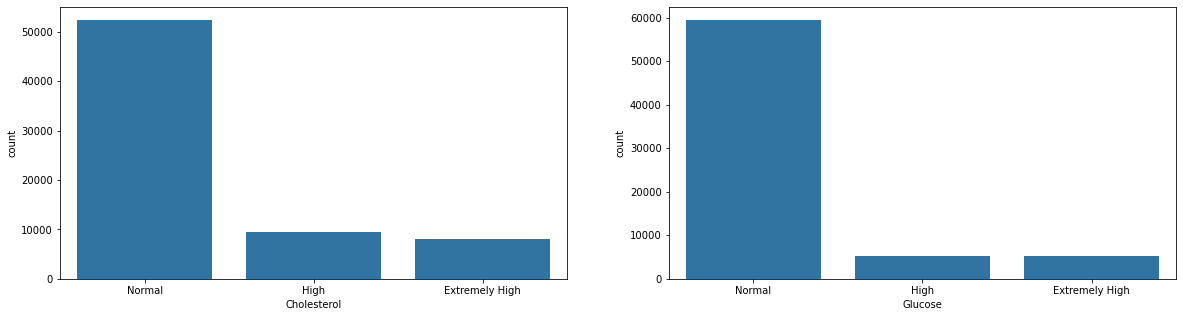

In [140]:
#setting figure size
plt.figure(figsize = [20,5])

#Setting my base color 
base_color = sb.color_palette()[0]

#Using seaborns countplot and subplot
#First plot
plt.subplot(1, 2, 1)
sb.countplot(data = cardio,x ='cholesterol',color=base_color);
plt.xlabel('Cholesterol');

#For the second plot
plt.subplot(1,2,2)
sb.countplot(data = cardio,x ='glucose',color=base_color);
plt.xlabel('Glucose');

### Observation:
The dataset doesnt indicate what levels fall into these categories.From observation, more than 50,000 of the patients have a normal cholesterol level. Patients with high cholesterol level slightly higher than those with and extremely high level.

It would be interesting to further explore this variable later on.

For the Glucose variable, the same applies about the dataset. From observation almost 60,000 patients have normal glucose level  with high and extremely glucose levels at about 5000 each.

> Next up,BMI.

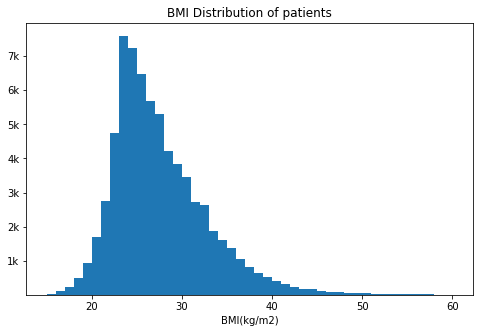

In [141]:
#Using a standard hist plot and setting bin size
binsize = 1
bin_edge = np.arange(15,60+binsize,binsize)
plt.figure(figsize=[8,5])
plt.hist(data= cardio, x ='bmi',bins=bin_edge)
#setting ticks and labels
ticks=[1000,2000,3000,4000,5000,6000,7000]
labels=['1k','2k','3k','4k','5k','6k','7k']
plt.yticks(ticks,labels)

plt.title('BMI Distribution of patients')
plt.xlabel('BMI(kg/m2)')
plt.show()

### Observation:
It was observed that there are outliers in the dataset, particularly from 60. There is need for further invesigation on this. After setting bin sizes to see the distribution more,A Unimodal right skewed distribution is observed. its peak falls around 24. This falls in the healthy category on the BMI scale.

It would be interesting to see its relationship with other variables later. As the Bmi is a major indication for cardiovascular disease.

> Next Up,Alcohol intake.

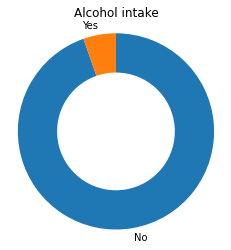

In [142]:
#setting my column unique value count
category = cardio['alcohol_intake'].value_counts()
#Using matplotlib donught chart
plt.pie(category, labels = category.index,startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});
plt.axis('square');
plt.title('Alcohol intake');

### Observation:
It is interesting to note that more than half of the patients do not ingest alcohol and the remaining of them do. 
There is usually a high percent of Cardiovascular diseased patients that drink alcohol.

>Next up,Smoking and Physical Activity.

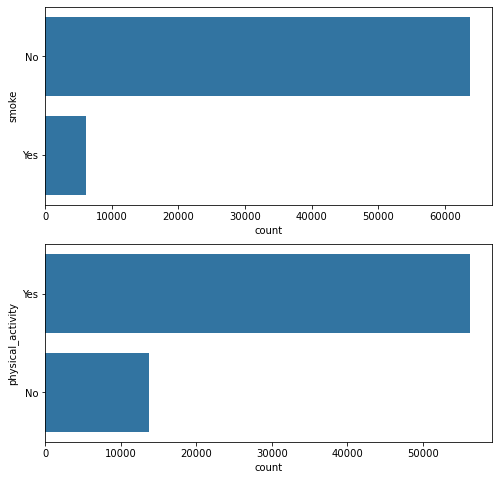

In [143]:
#Using seaborns countplot and subplot
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
#Setting my base color 
base_color = sb.color_palette()[0]
sb.countplot(data = cardio,y ='smoke',color=base_color, ax = ax[0])
sb.countplot(data = cardio,y ='physical_activity',color=base_color, ax = ax[1])
plt.show()

### Observation:
From the horizontal bar chart plotted it is noted that more than 60,000 patients do not smoke, And less than 10,000 do smoke.

Smoking has been proven to be one of the risk factors for Cardiovascular dieseases. I will be exploring this relationship of the smokers later on

For Physical Activity, we can see that more than 50,000 patients perform physical activities and less than 20,000 patients dont.

>Next Up, the Systolic and Diastolic blood pressure.

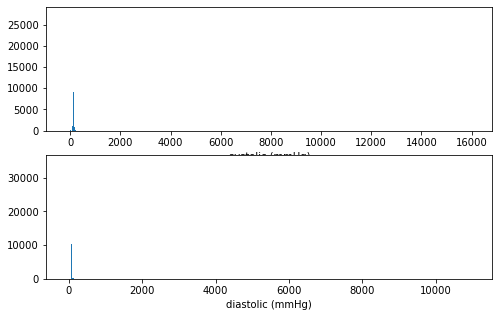

In [144]:
#using a standard scaled Hist plot and subplot

fig,ax = plt.subplots(nrows = 2, figsize =[8,5])
bp_variables = ['systolic','diastolic']
for i in range(len(bp_variables)):
    var = bp_variables[i]
    bins = np.arange(min(cardio[var]), max(cardio[var])+5, 5)
    ax[i].hist(data = cardio, x = var, bins = bins)
    ax[i].set_xlabel('{} (mmHg)'.format(var))
plt.show()

### Observation:
From the first plotting for the distribution of both blood pressure variables, I discovered there were outliers in the dataset. During my preliminary wranglling I discovered there were some negative values and outrageously high values as the maximum for both the systolic and diastolic,So the outliers didnt come as a suprise.

It is worth taking a look at and filtering out this outliers in the dataset.

In [145]:
#selecting and filtering out the outliers using criteria outballed from the plots
#Viewing the extreme high outliers in the dataset
high_outliers = (cardio['systolic']> 250) | (cardio['diastolic'] >120)
print(high_outliers.sum())
print(cardio.loc[high_outliers,:])

1096
       age  gender  height  weight  systolic  diastolic cholesterol glucose  \
id                                                                            
314     48    Male     183    98.0       160       1100      Normal    High   
334     61    Male     157    60.0       160       1000        High  Normal   
357     50  Female     150    83.0       140        800      Normal  Normal   
458     65  Female     176    63.0       160       1000        High    High   
482     52  Female     154    81.0       140       1000        High  Normal   
...    ...     ...     ...     ...       ...        ...         ...     ...   
99659   64  Female     167    81.0       160       1000      Normal  Normal   
99798   60  Female     152    56.0       160       1000      Normal  Normal   
99807   59    Male     168    95.0       160       1000      Normal  Normal   
99816   62    Male     166    78.0       170       1000      Normal  Normal   
99955   59    Male     168    63.0       140   

In [146]:
#Creating a new subset dataframe and dropping the high outliers
cardio_bp = cardio.drop(cardio.index[[high_outliers]])
cardio_bp

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


age  gender  height  weight  systolic  diastolic     cholesterol  \
id                                                                        
0       51    Male     168    62.0       110         80          Normal   
1       56  Female     156    85.0       140         90  Extremely High   
2       52  Female     165    64.0       130         70  Extremely High   
3       49    Male     169    82.0       150        100          Normal   
4       48  Female     156    56.0       100         60          Normal   
...    ...     ...     ...     ...       ...        ...             ...   
99993   53    Male     168    76.0       120         80          Normal   
99995   62  Female     158   126.0       140         90            High   
99996   53    Male     183   105.0       180         90  Extremely High   
99998   62  Female     163    72.0       135         80          Normal   
99999   57  Female     170    72.0       120         80            High   

      glucose smoke alcohol_intake physical_activity cv_disease   bmi  
id                                                                     
0      Normal    No             No               Yes         No  22.0  
1      Normal    No             No               Yes        Yes  34.9  
2      Normal    No             No                No        Yes  23.5  
3      Normal    No             No               Yes        Yes  28.7  
4      Normal    No             No                No         No  23.0  
...       ...   ...            ...               ...        ...   ...  
99993  Normal   Yes             No               Yes         No  26.9  
99995    High    No             No               Yes        Yes  50.5  
99996  Normal    No            Yes                No        Yes  31.4  
99998    High    No             No                No        Yes  27.1  
99999  Normal    No             No               Yes         No  24.9  

[68904 rows x 13 columns]

In [147]:
##Viewing the extreme low outliers in the newly created dataset
low_outliers =(cardio_bp['systolic']<40) | (cardio_bp['diastolic'] <40)
print(low_outliers.sum())
print(cardio_bp.loc[low_outliers,:])

229
       age  gender  height  weight  systolic  diastolic     cholesterol  \
id                                                                        
594     46  Female     157    72.0       150         30          Normal   
815     59  Female     168    78.0        14         90            High   
1294    60    Male     175    70.0        14         90  Extremely High   
1360    50  Female     172    65.0        11         80          Normal   
2260    53  Female     165    66.0        12         80          Normal   
...    ...     ...     ...     ...       ...        ...             ...   
98039   59  Female     160    59.0        12         80          Normal   
98213   52  Female     158    74.0        14         90          Normal   
98568   53  Female     154    77.0        14         90          Normal   
98743   43    Male     176    65.0        12         80          Normal   
99328   59  Female     155    69.0        13         90          Normal   

              glucos

In [148]:
#Dropping the low outliers from the newly created dataset
cardio_bp = cardio_bp.drop(cardio_bp.index[[low_outliers]])
cardio_bp

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\indexes\base.py:5055: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


age  gender  height  weight  systolic  diastolic     cholesterol  \
id                                                                        
0       51    Male     168    62.0       110         80          Normal   
1       56  Female     156    85.0       140         90  Extremely High   
2       52  Female     165    64.0       130         70  Extremely High   
3       49    Male     169    82.0       150        100          Normal   
4       48  Female     156    56.0       100         60          Normal   
...    ...     ...     ...     ...       ...        ...             ...   
99993   53    Male     168    76.0       120         80          Normal   
99995   62  Female     158   126.0       140         90            High   
99996   53    Male     183   105.0       180         90  Extremely High   
99998   62  Female     163    72.0       135         80          Normal   
99999   57  Female     170    72.0       120         80            High   

      glucose smoke alcohol_intake physical_activity cv_disease   bmi  
id                                                                     
0      Normal    No             No               Yes         No  22.0  
1      Normal    No             No               Yes        Yes  34.9  
2      Normal    No             No                No        Yes  23.5  
3      Normal    No             No               Yes        Yes  28.7  
4      Normal    No             No                No         No  23.0  
...       ...   ...            ...               ...        ...   ...  
99993  Normal   Yes             No               Yes         No  26.9  
99995    High    No             No               Yes        Yes  50.5  
99996  Normal    No            Yes                No        Yes  31.4  
99998    High    No             No                No        Yes  27.1  
99999  Normal    No             No               Yes         No  24.9  

[68675 rows x 13 columns]

### Observation:
Having observed the extreme high and low outliers. It was of note that these numbers must have been due to human error when inputting.When combined, it is less than 2% of the dataset so I decided to drop these rows and put them into a new dataframe for replotting.

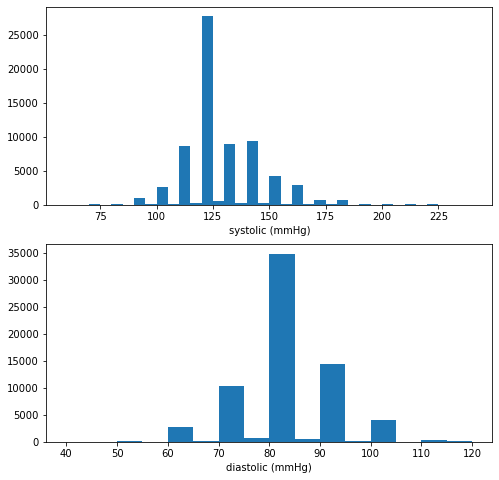

In [149]:
#Using hist plot

fig,ax = plt.subplots(nrows = 2, figsize =[8,8])

bp_variables = ['systolic','diastolic']
for i in range(len(bp_variables)):
    var = bp_variables[i]
    bins = np.arange(min(cardio_bp[var]), max(cardio_bp[var])+5, 5)
    ax[i].hist(data = cardio_bp, x = var, bins = bins)
    ax[i].set_xlabel('{} (mmHg)'.format(var))
plt.show()

### Observation:
is observed that both distributions are unimodal and the peak for patients with systolic blood pressure fell between 120 and 125.The distribution also shows that alot of patients fall in between 120 and 225. From medical perspective it can be inferred that most patients in the distribution have high systolic blood pressure.

From the diastolic distribution, the peak blood pressure fell between 80 and 85. From the obseravtion, most of the patients fall in between 80 and 120.From medical perspective it can be inferred that most patients in the distribution have high diastolic blood pressure.

From the exploration of the two variables, it is observed that majority of the patients fall into the category that is indicative of high blood pressure. As the normal blood pressure for Systolic is 90-120mmHg and that of diastolic is 60-80mmHg.

I will explore their relationship further.

>Next up is the cardiovascular disease.

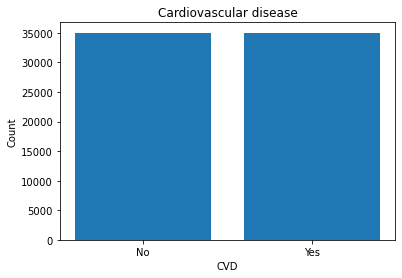

In [150]:
#Using matplotlib bar chart
#Return series with unique and value_counts
x= cardio['cv_disease'].unique()
y = cardio['cv_disease'].value_counts(sort = False)
plt.bar(x,y)
plt.title('Cardiovascular disease')
plt.xlabel('CVD')
plt.ylabel('Count')
plt.show()

### Observation:
This is really interesting as the target variable upon plotting shows a 50|50 interpretation. This means The people with cardiovascular disease is approximately equal to people without.

This concludes the first aspect of my exploration.

### Univariate exploration summary
>After Univariate exploration of the variables of my interest, which is all except the id variable. I discovered interesting patterns in some of the variables, such as the cholesterol, bmi,systolic,diastolic,weight,smoke and the cardiovascular disease. Which I will further explore to see relationshps in some. I did not see a need to carry out any major transformations to see the pattern in the variabes properly.

>I carried out transformations  on the systolic and diastolic variables where i filtered out the extreme low and high outliers and put it into a new dataset.This was because they contained extreme numbers after investigation which could have been due to human error. and i discovered interesting patters after replotting.


## Bivariate Exploration

> In this section, I will investigate relationships between pairs of variables in the
data.

To start off with, I want to look at the pairwise correlations present between features in the data.

In [151]:
#creating a list of my numeric variables
numeric_vars = ['height','weight','systolic','diastolic','bmi']

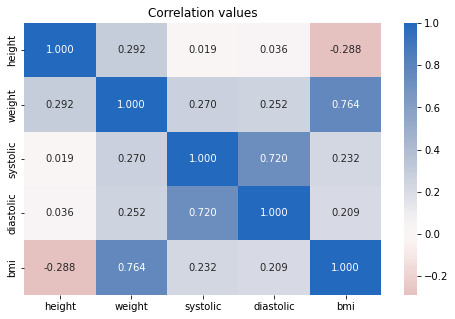

In [152]:
#correlation plot using my new dataframe
plt.figure(figsize=[8,5])
sb.heatmap(cardio_bp[numeric_vars].corr(), annot = True, fmt = '.3f',cmap = 'vlag_r', center = 0)
plt.title('Correlation values')
plt.show()

As suspected, weight and bmi are highly correlated with one another.Also worthy of note is the systolic and diastolic as they are highly correlated too. Height seems to have least amount of correlation with any of the numeric variables.

Now to plot and see this relationship. 

>I will first start with the relationship between Gender and Cardiovascular disease


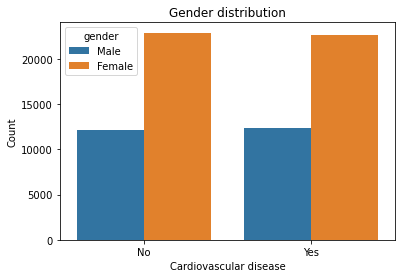

In [153]:
#using seaborns countplot 
sb.countplot(data = cardio,x='cv_disease',hue='gender')
#setting axis labels
plt.title('Gender distribution')
plt.xlabel('Cardiovascular disease')
plt.ylabel('Count');

### Observation:
In the previous secction I only looked at the distribution of patients with or without a cardiovascular disease. So in this exploration I wanted to see the relationship with gender. From the plot we can observe that the gender that has Cardiovascular disease is significantly more than the men with.
 > Nest up, the systolic and diastolic.

In [154]:
#creating a categorical version of diastolic, using floor division(lowest integer divisor)
cardio_bp['diastolic_category'] =((cardio_bp['diastolic']//10)*10).astype(int)

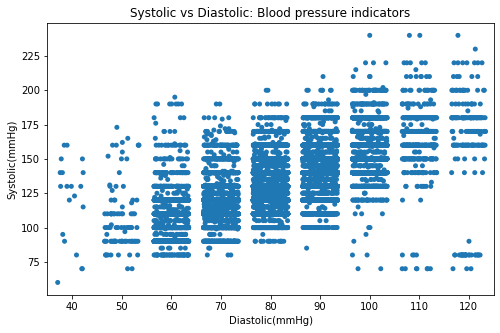

In [155]:
#using seaborn scatter plot and alpha to reduce overplotting and see distribution well
plt.figure(figsize=[8,5])
#setting a bse color
base_color = sb.color_palette()[0]
sb.stripplot(data= cardio_bp,x='diastolic_category',y='systolic',jitter=0.35,color = base_color)
#Setting axis and title labels
plt.title('Systolic vs Diastolic: Blood pressure indicators')
plt.xlabel('Diastolic(mmHg)')
plt.ylabel('Systolic(mmHg)');

#### Observation:
This is interesting. As previously stated, it can be confirmed now that the systolic and diastolic are positively correlated as increase in systolic is an increase in diastolic with majority of the distribution of patients falling between 100-175 for systolic and above 60 for diastolic.Blood pressure which is measured using systolic and diastolic doesnt have one right fit.

The outliers like extremely low systolic and high dystolic, or low systolic and low diastolic in this plot needs further investigation, as it can be correct or also human error from inputting.

It will be interesting to see the relationship with Cardiovascular disease later on.

> Next up, Cholesterol and Cv disease

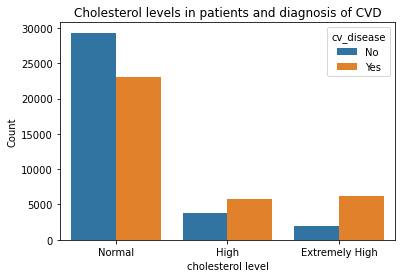

In [156]:
#using a clustered bar chart
sb.countplot(data = cardio,x='cholesterol',hue='cv_disease')
plt.title('Cholesterol levels in patients and diagnosis of CVD')
plt.xlabel('cholesterol level')
plt.ylabel('Count');

### Observation:
From the plot we can see that even patients with normal cholesterol levels have cardiovascular disease. Therefore patients having a normal cholesterol level are not exempt from cardiovascular diseases as there are other risk factors. I will not be exploring this variable further.

>Next up, we will plot the BMI and Weight 

In [157]:
#creating a seed for reproducibility for my random sample from the cardio dataset
np.random.seed(2000)
#creating a sample dataset from my original dataset to reduce overplotting
sample = np.random.choice(cardio.shape[0],1000,replace = False)
cardio_subset = cardio.iloc[sample]

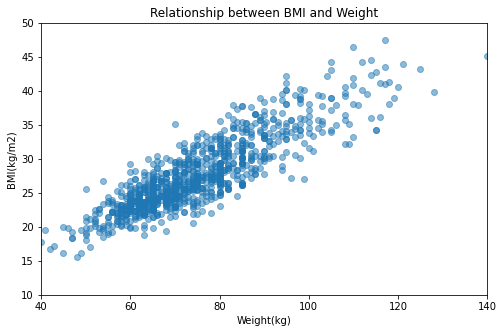

In [158]:
#Using scatter plot and setting figure size
plt.figure(figsize=[8,5])
plt.scatter(data = cardio_subset, x ='weight', y = 'bmi',alpha = 1/2)
#setting axis limits to view the plot distribution better
plt.ylim((10,50))
plt.xlim((40,140))
#setting title and axis labels
plt.title('Relationship between BMI and Weight')
plt.ylabel('BMI(kg/m2)')
plt.xlabel('Weight(kg)');

### Observation:
From the plot we can see that weight and bmi are positively correlated as previously stated. As an increase in the body mass index also showed an increase in weight. And a very high distribution of patients between 60 and 100 kg and 18 and 35 kg/m2 for the bmi axis. 

Having seen this relationship. it will be interesting to see their relationship with patients diagnosis of cardiovascular disease later on.

>Next Up, Weight and smoking

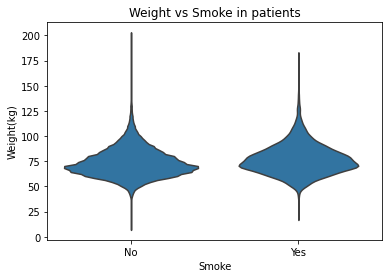

In [159]:
#Using seabornviolin plot to see the weight and smoking variable

#setting a base color
base_color = sb.color_palette()[0]

sb.violinplot(data=cardio, x='smoke', y='weight',color=base_color, inner=None)
plt.title('Weight vs Smoke in patients')
plt.xlabel('Smoke')
plt.ylabel('Weight(kg)');

### Observation:
From my observation of these plots there doesnt really seem to be a significant relationship or difference in the distribution of weight for those who smoke or do not smoke. I will not be exploring this variables further.

>This is the end of my bivariate distribution.

### Bivariate Exploration Summary
> The systolic and diastolic variables have a very interesting relationship as suspected. From the correlation chart it was shown that they have very low correlation(relationship) with the other numeric variables in the dataset. I went ahead to plot them together to see their relationship besides the correlation number.
I also discovered relationships between the BMI and weight positive relationship, that bmi increases as weight increases.
Worthy of note too is the gender and cardiovascular disease relationship, it was observed that more females have cardiovascular diseases than the males.

> I discovered another interesting relationship between the cholesterol and the cardiovascular disease variable.Some Patients in all levels of cholesterol had cardiovascular disease.Prior to the exploration I expected there to be less patients with normal cholesterol to have a cardiovascular disease. This is also normal, as cholesterol is not the only causative factor of cardiovascular diseases.

## Multivariate Exploration

> In this section I will be performing multivariate exploration on three or more variables. The main variabes I want to explore more is the relationship between the bmi, weight, systolic, diastolic and cardiovascular disease.

I will start by exploring the relationship between CVDisease, Weight and BMI

In [160]:
#creating a seed for reproducibility for my random sample from the cardio dataset
np.random.seed(2000)
#creating a sample dataset from my original dataset to reduce overplotting
sample = np.random.choice(cardio.shape[0],500,replace = False)
cardio_subset = cardio.iloc[sample]

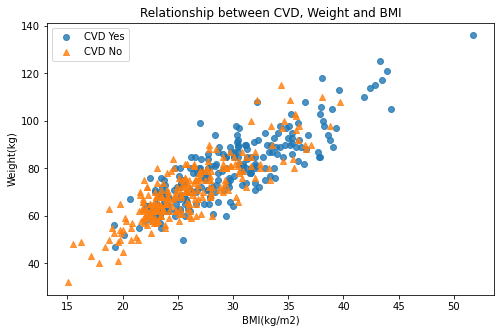

In [161]:
#setting my figure size
plt.figure(figsize=[8,5])
#Creating markers for the categories
cvd_markers =[['Yes','o'],['No','^']]
#looping through the markers to create a plot
for cvd, marker in cvd_markers:
    plot_data= cardio_subset.loc[cardio_subset['cv_disease']== cvd]
    sb.regplot(data = plot_data,x='bmi',y='weight',x_jitter = 0.05,fit_reg=False,marker=marker);
#setting title and axis labels
plt.title('Relationship between CVD, Weight and BMI')
plt.xlabel('BMI(kg/m2)')
plt.ylabel('Weight(kg)')
plt.legend(['CVD Yes','CVD No']);

#### Observations:
After getting a sample size for the dataset to reduce overplotting. From observation it is of note to say that majority of the patients diagnosed with a cardiovascular disease have high body mass index(bmi) and are very clustered from 25 above which is indicative for for obesity. And majority of the patients with Bmi less than 30 fall into the category of patients without cardiovascular disease.Likewise for the weight axis as majority of the patients with weight below 80kg do not have a cardiovascular disease.

It is plausible to say that having a bmi greater than 25 and weight greater than 80 is indicative of being diagnosed with a cardiovascular disease. Viceversa too for patients without a cardiovascular disease.
>Next Up, Systolic, Diastolic and CVD

In [162]:
#creating a categorical version of diastolic, using floor division(lowest integer divisor)
cardio_bp['diastolic_category'] =((cardio_bp['diastolic']//10)*10).astype(int)

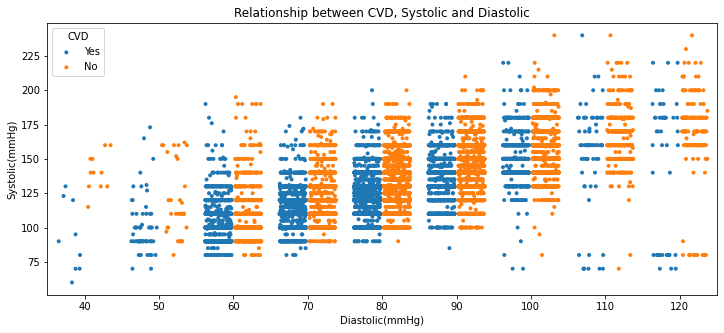

In [163]:
#Using seaborns stripplot using the diastolic category created
plt.figure(figsize=[12,5])
sb.stripplot(data=cardio_bp,x='diastolic_category',y = 'systolic',hue='cv_disease',jitter = 0.35,dodge = True,size=4)
#setting title and axis labels
plt.title('Relationship between CVD, Systolic and Diastolic')
plt.xlabel('Diastolic(mmHg)')
plt.ylabel('Systolic(mmHg)')
plt.legend(['Yes','No'],title='CVD');

#### Observation:
This is an interesting relationship.I created used jitter and dodge to reduce overplotting. Previously we noted that the systolic and diastolic were correlated but not as high as the correlation between weight and bmi. And we can see that although correlated, there are a alot of outliers which also means that the distribution of these variables does not belong to the category of a one size fits all,meaning blood pressure levels using both variables is different for every patient.

Having this in mind, I created a scatter plot using diastolic as a category to see their relationship with cardiovascular disease diagnosis. And from my observation this is a sparsed distribution.More than Half of the distribution have a systolic greater than 125 and diastolic greater than 80. There are patients with systolic lower than 125 and diastolic lower than 80 with a cardiovascular disease. And patients with a high systolic and high diastolic with and without a cardiovascular disease.

It is plausible to say that although systolic and diastolic are used to measure blood pressure, having a high blood pressure doesnt necessarily indicate presence of a cardiovascular disease. Other risk facftors are involved in this set of patients. 


### Multivariate exploration summary
   > The weight and bmi features of the dataset with the CV disease really showed a strong positive relationship. previously observing the relationships of the weight and bmi, I suspected there was a possible relationship with the cardiovascular disease and it turned out to be right. Majority of the patients with a bmi greater than 25 and weight grater than 80 were diagnosed with having a cardiovascular disease and most of those lower did not.


> The suprising relationship I noticed was between systolic,diastolic and diagnosis of cardiovascular disease. I had a previous assumption that majority of the patients with CVD will fall into the category of a high systolic and a high diastolic. But it turned out to be a spearse distribution but with a number of the patients falling into the high systolic and diatolic category.

## Conclusions

> 1) The amount of Females that have cardiovascular diseases is about 14,000 more than the males that have this cardiovascular disease. 

 This was first explored by checking the general population plot where I discovered that approximately 50% of the population had and the other 50% did not have cardiovasculr disease. I furthered explored the distribution with gender where I observed and concluded that more females have cardiovascular diseases than the males.


> 2) Most Patients in the distribution have a BMI greater than 25: 
 
   This was suspected from the first exploration of the bmi variable alone, After plotting the relationship with weight, it showed a large distribution of patients fell into the bmi greater than 25.

> 3) Patients with BMI greater than 25kg/m2 and Weight above 80kg have cardiovascular disease:

This finding was concluded from exploring the individual variables, i.e the weight, bmi and cardiovascular disease,with plots, then the relationship between Bmi and weight and the final exploration of the relationship between all three variables using scattered plots.

> 4) A large distribution of the patients have high blood pressure.

This finding was concluded from exploring the systolic and diastolic variables individually then their relationship together where a positive correlation was noticed too. A final scatter plot was plotted to see the relationship between all three variables.

